# 加载数据

ps：因时间、测试文档有限，数据量较少，无法进行深入分析，以下分析仅供参考

* 共分析66个pdf文档，大小不一，从几十KB到几百MB不等
* 压缩参数设置如下：
    * quality：80
    * max_dpi：120

In [20]:
import pandas as pd

meta_data = pd.read_csv('compress-pdf-meta.csv')
compress_data = pd.read_csv('compress-pdf-result.csv')

# pdf数据基本信息

In [5]:
# pdf基本信息
meta_data.head()

,FileName,Version,Size,PageCount,ImageObjCount,ImageObjSize,PathObjCount,TextObjCount,TextCount
0,/Users/zhangmeng56/Documents/github/go-practic...,14,278861,1,3,30735,1,165,427
1,/Users/zhangmeng56/Documents/github/go-practic...,14,128801,1,1,16270,46,100,313
2,/Users/zhangmeng56/Documents/github/go-practic...,14,244103,1,0,0,44,82,286
3,/Users/zhangmeng56/Documents/github/go-practic...,14,143836,1,3,30971,128,83,270
4,/Users/zhangmeng56/Documents/github/go-practic...,14,160153,1,0,0,81,141,552


In [6]:
# pdf压缩结果
compress_data.head()

,FileName,PageCount,Size,CompressedSize,Ratio,Duration
0,/Users/zhangmeng56/Documents/github/go-practic...,1,253897,253812,0.033478,30.932375
1,/Users/zhangmeng56/Documents/github/go-practic...,1,115663,115628,0.030260,12.809708
2,/Users/zhangmeng56/Documents/github/go-practic...,1,240190,240196,-0.002498,3.356208
3,/Users/zhangmeng56/Documents/github/go-practic...,1,120167,120054,0.094036,14.979125
4,/Users/zhangmeng56/Documents/github/go-practic...,1,157672,157678,-0.003805,2.055167


In [8]:
# 合并数据展示，通过FileName进行合并
combined_data = pd.merge(meta_data, compress_data, on='FileName')
combined_data.head()

,FileName,Version,Size_x,PageCount_x,ImageObjCount,ImageObjSize,PathObjCount,TextObjCount,TextCount,PageCount_y,Size_y,CompressedSize,Ratio,Duration
0,/Users/zhangmeng56/Documents/github/go-practic...,14,278861,1,3,30735,1,165,427,1,253897,253812,0.033478,30.932375
1,/Users/zhangmeng56/Documents/github/go-practic...,14,128801,1,1,16270,46,100,313,1,115663,115628,0.030260,12.809708
2,/Users/zhangmeng56/Documents/github/go-practic...,14,244103,1,0,0,44,82,286,1,240190,240196,-0.002498,3.356208
3,/Users/zhangmeng56/Documents/github/go-practic...,14,143836,1,3,30971,128,83,270,1,120167,120054,0.094036,14.979125
4,/Users/zhangmeng56/Documents/github/go-practic...,14,160153,1,0,0,81,141,552,1,157672,157678,-0.003805,2.055167


In [9]:
# 数据整体描述
combined_data.describe()

,Version,Size_x,PageCount_x,ImageObjCount,ImageObjSize,PathObjCount,TextObjCount,TextCount,PageCount_y,Size_y,CompressedSize,Ratio,Duration
count,66.000000,6.600000e+01,66.000000,66.000000,6.600000e+01,66.000000,66.000000,6.600000e+01,66.000000,6.600000e+01,6.600000e+01,66.000000,66.000000
mean,14.924242,5.899377e+07,168.772727,239.666667,4.500208e+07,3016.318182,16396.575758,1.320797e+05,168.772727,5.686515e+07,3.704899e+07,19.801296,15394.250753
std,2.002388,7.922773e+07,245.616261,569.990427,7.305283e+07,8208.450541,44217.395013,2.909680e+05,245.616261,7.848763e+07,6.259593e+07,32.486448,42363.281858
min,10.000000,5.240000e+02,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,5.240000e+02,5.930000e+02,-30.196937,0.435709
25%,14.000000,1.754358e+05,1.000000,0.250000,9.975000e+01,0.000000,0.000000,0.000000e+00,1.000000,1.746502e+05,1.646695e+05,-0.001001,11.406521
50%,15.000000,1.155143e+07,7.000000,11.500000,5.097054e+06,3.500000,1.000000,1.000000e+01,7.000000,1.155143e+07,7.136040e+06,0.759523,523.424375
75%,16.750000,1.400097e+08,328.500000,175.750000,6.394345e+07,673.250000,2287.000000,3.508250e+03,328.500000,8.647678e+07,4.187064e+07,40.266939,7427.582083
max,17.000000,2.070074e+08,729.000000,3549.000000,3.532355e+08,46029.000000,272094.000000,1.127952e+06,729.000000,2.070074e+08,2.059345e+08,99.882568,281369.644166


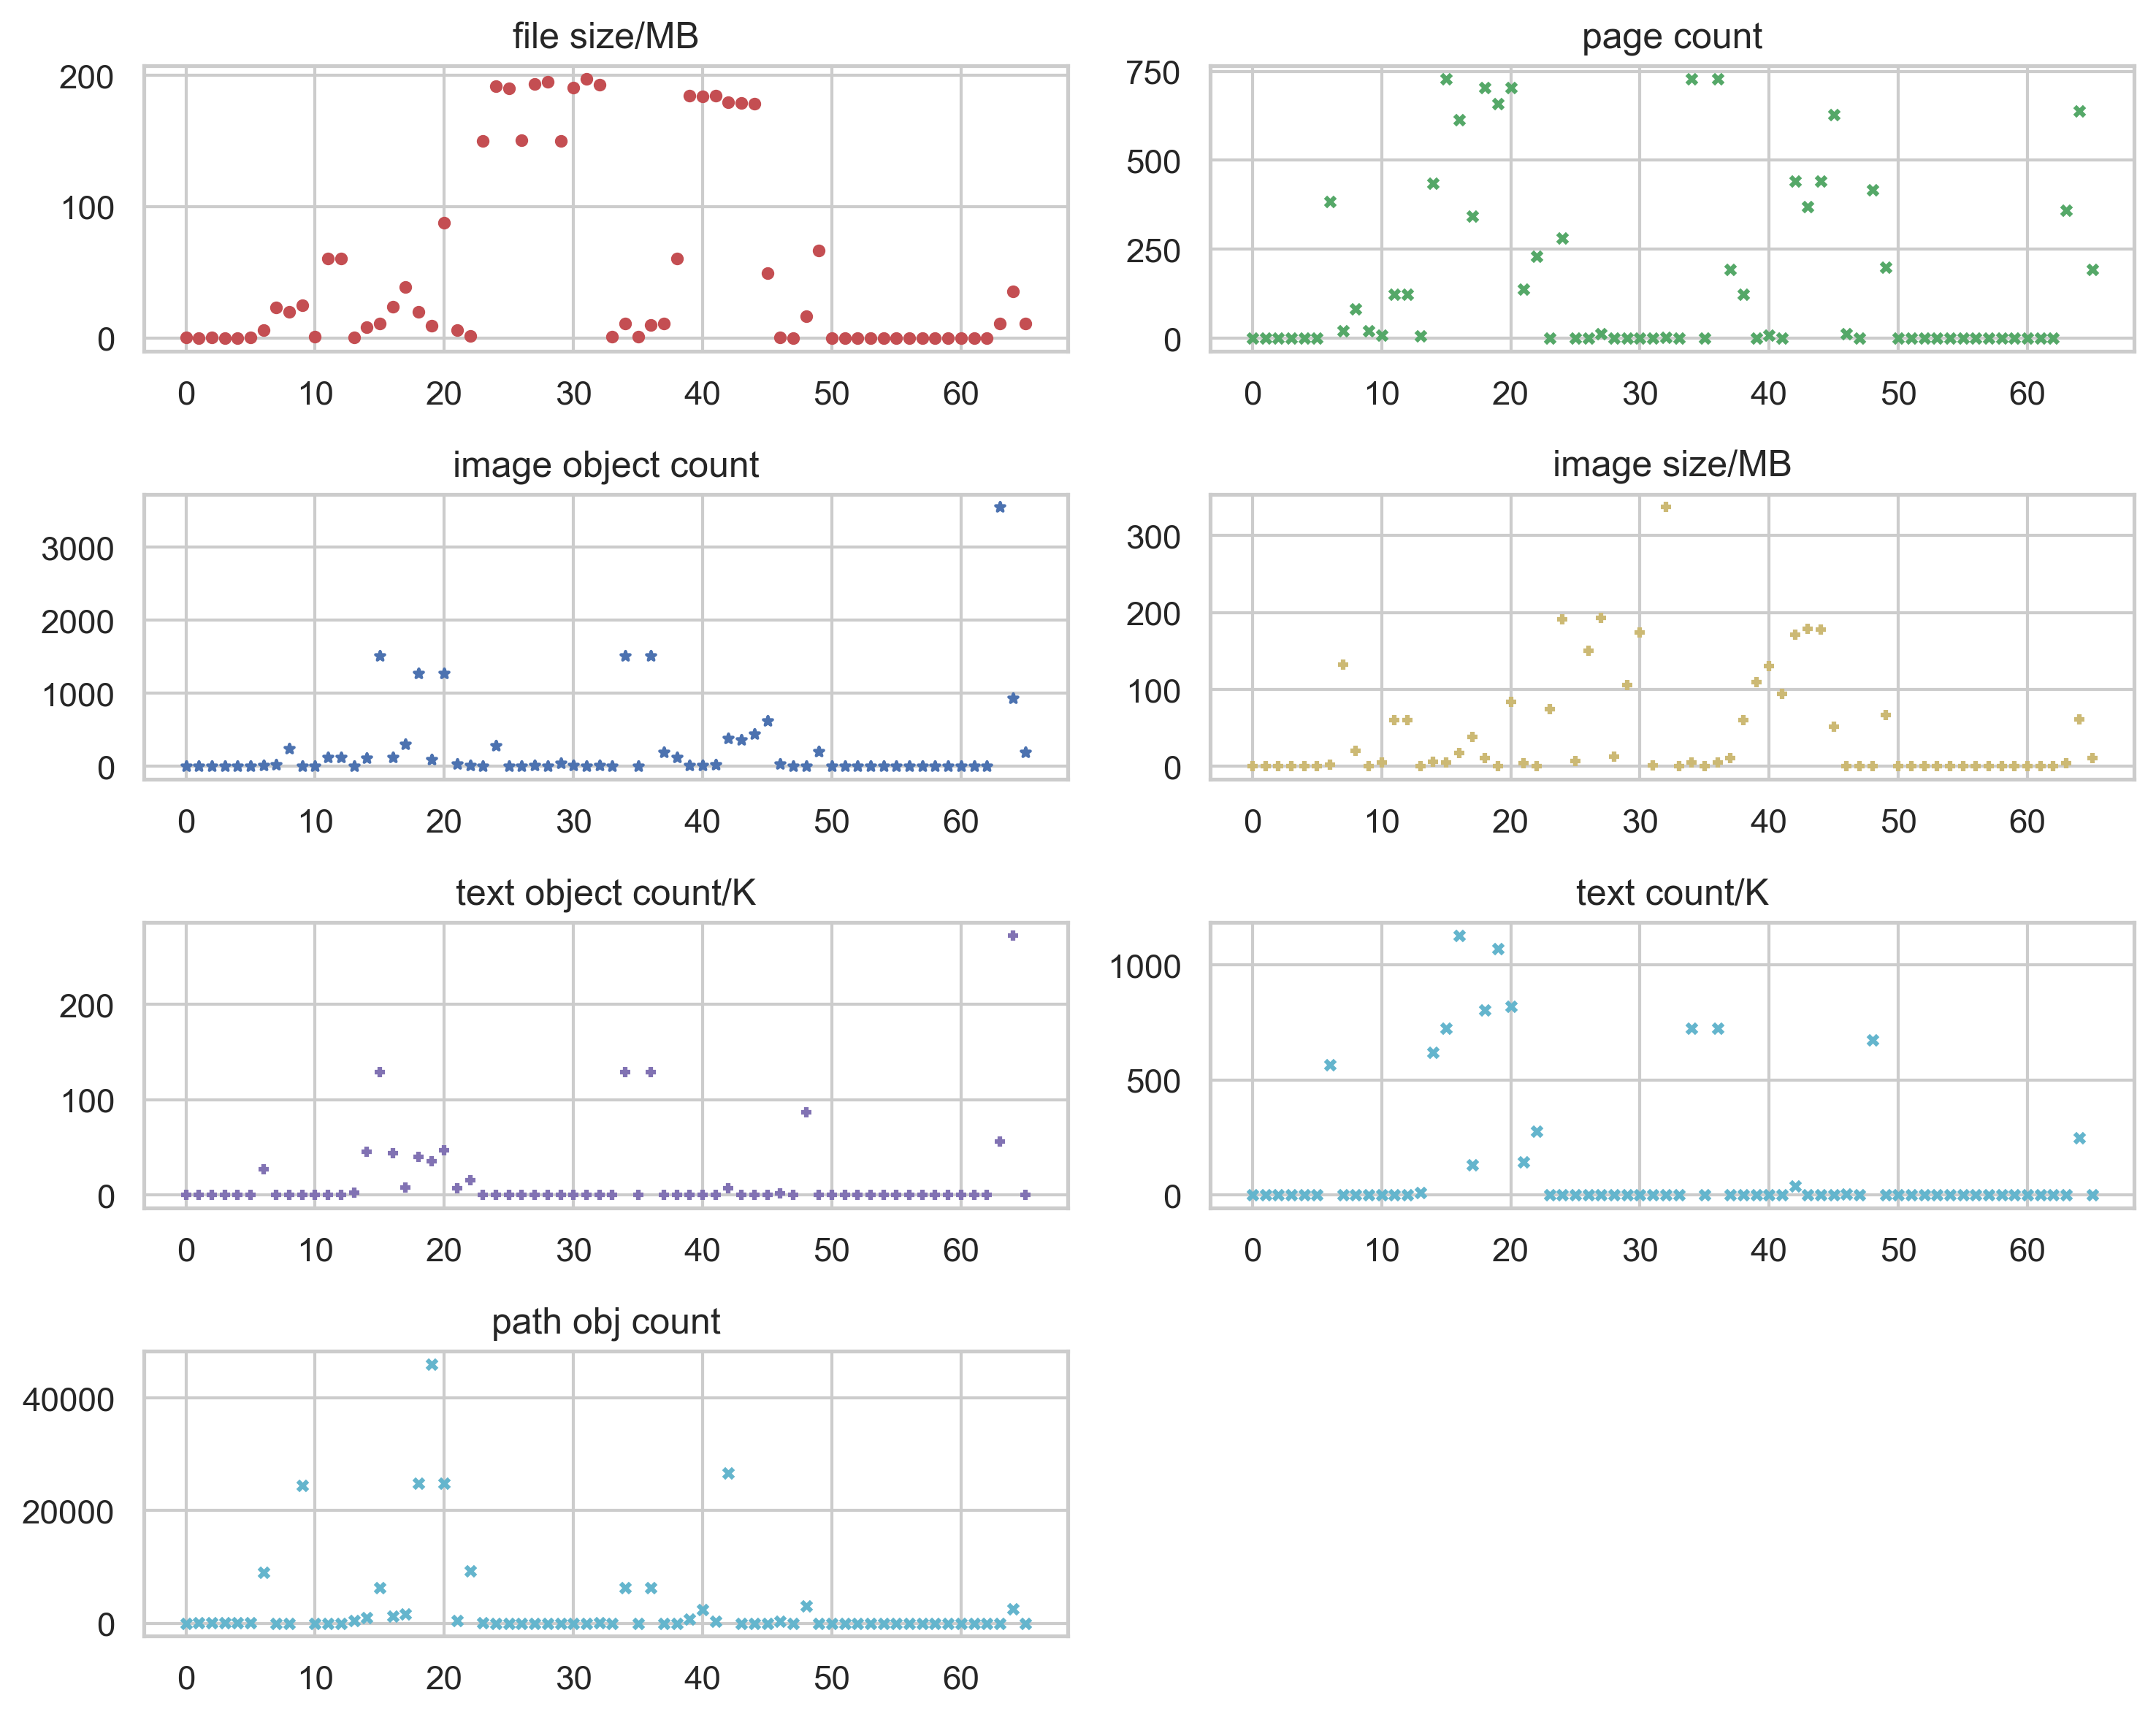

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme(style="")

# 创建子图
fig, axs = plt.subplots(4, 2, figsize=(10, 8), dpi=300)

# 绘制散点图
axs[0, 0].scatter(combined_data.index, combined_data['Size_y']/1024/1024, marker='o', color='r', s=10)
axs[0, 0].set_title('file size/MB')

axs[0, 1].scatter(combined_data.index, combined_data['PageCount_y'], marker='x', color='g', s=10)
axs[0, 1].set_title('page count')

axs[1, 0].scatter(combined_data.index, combined_data['ImageObjCount'], marker='*', color='b', s=10)
axs[1, 0].set_title('image object count')  

axs[1, 1].scatter(combined_data.index, combined_data['ImageObjSize']/1024/1024, marker='+', color='y', s=10)
axs[1, 1].set_title('image size/MB')  

axs[2, 0].scatter(combined_data.index, combined_data['TextObjCount']/1000, marker='+', color='m', s=10)
axs[2, 0].set_title('text object count/K')  

axs[2, 1].scatter(combined_data.index, combined_data['TextCount']/1000, marker='x', color='c', s=10)
axs[2, 1].set_title('text count/K')  

axs[3, 0].scatter(combined_data.index, combined_data['PathObjCount'], marker='x', color='c', s=10)
axs[3, 0].set_title('path obj count')  

axs[3, 1].remove()

# 调整布局
plt.tight_layout()
plt.show()

# pdf内容对压缩比的影响

In [41]:
# 不同pdf信息对压缩效率的影响
# 画散点图

# pdf内容对压缩速度的影响

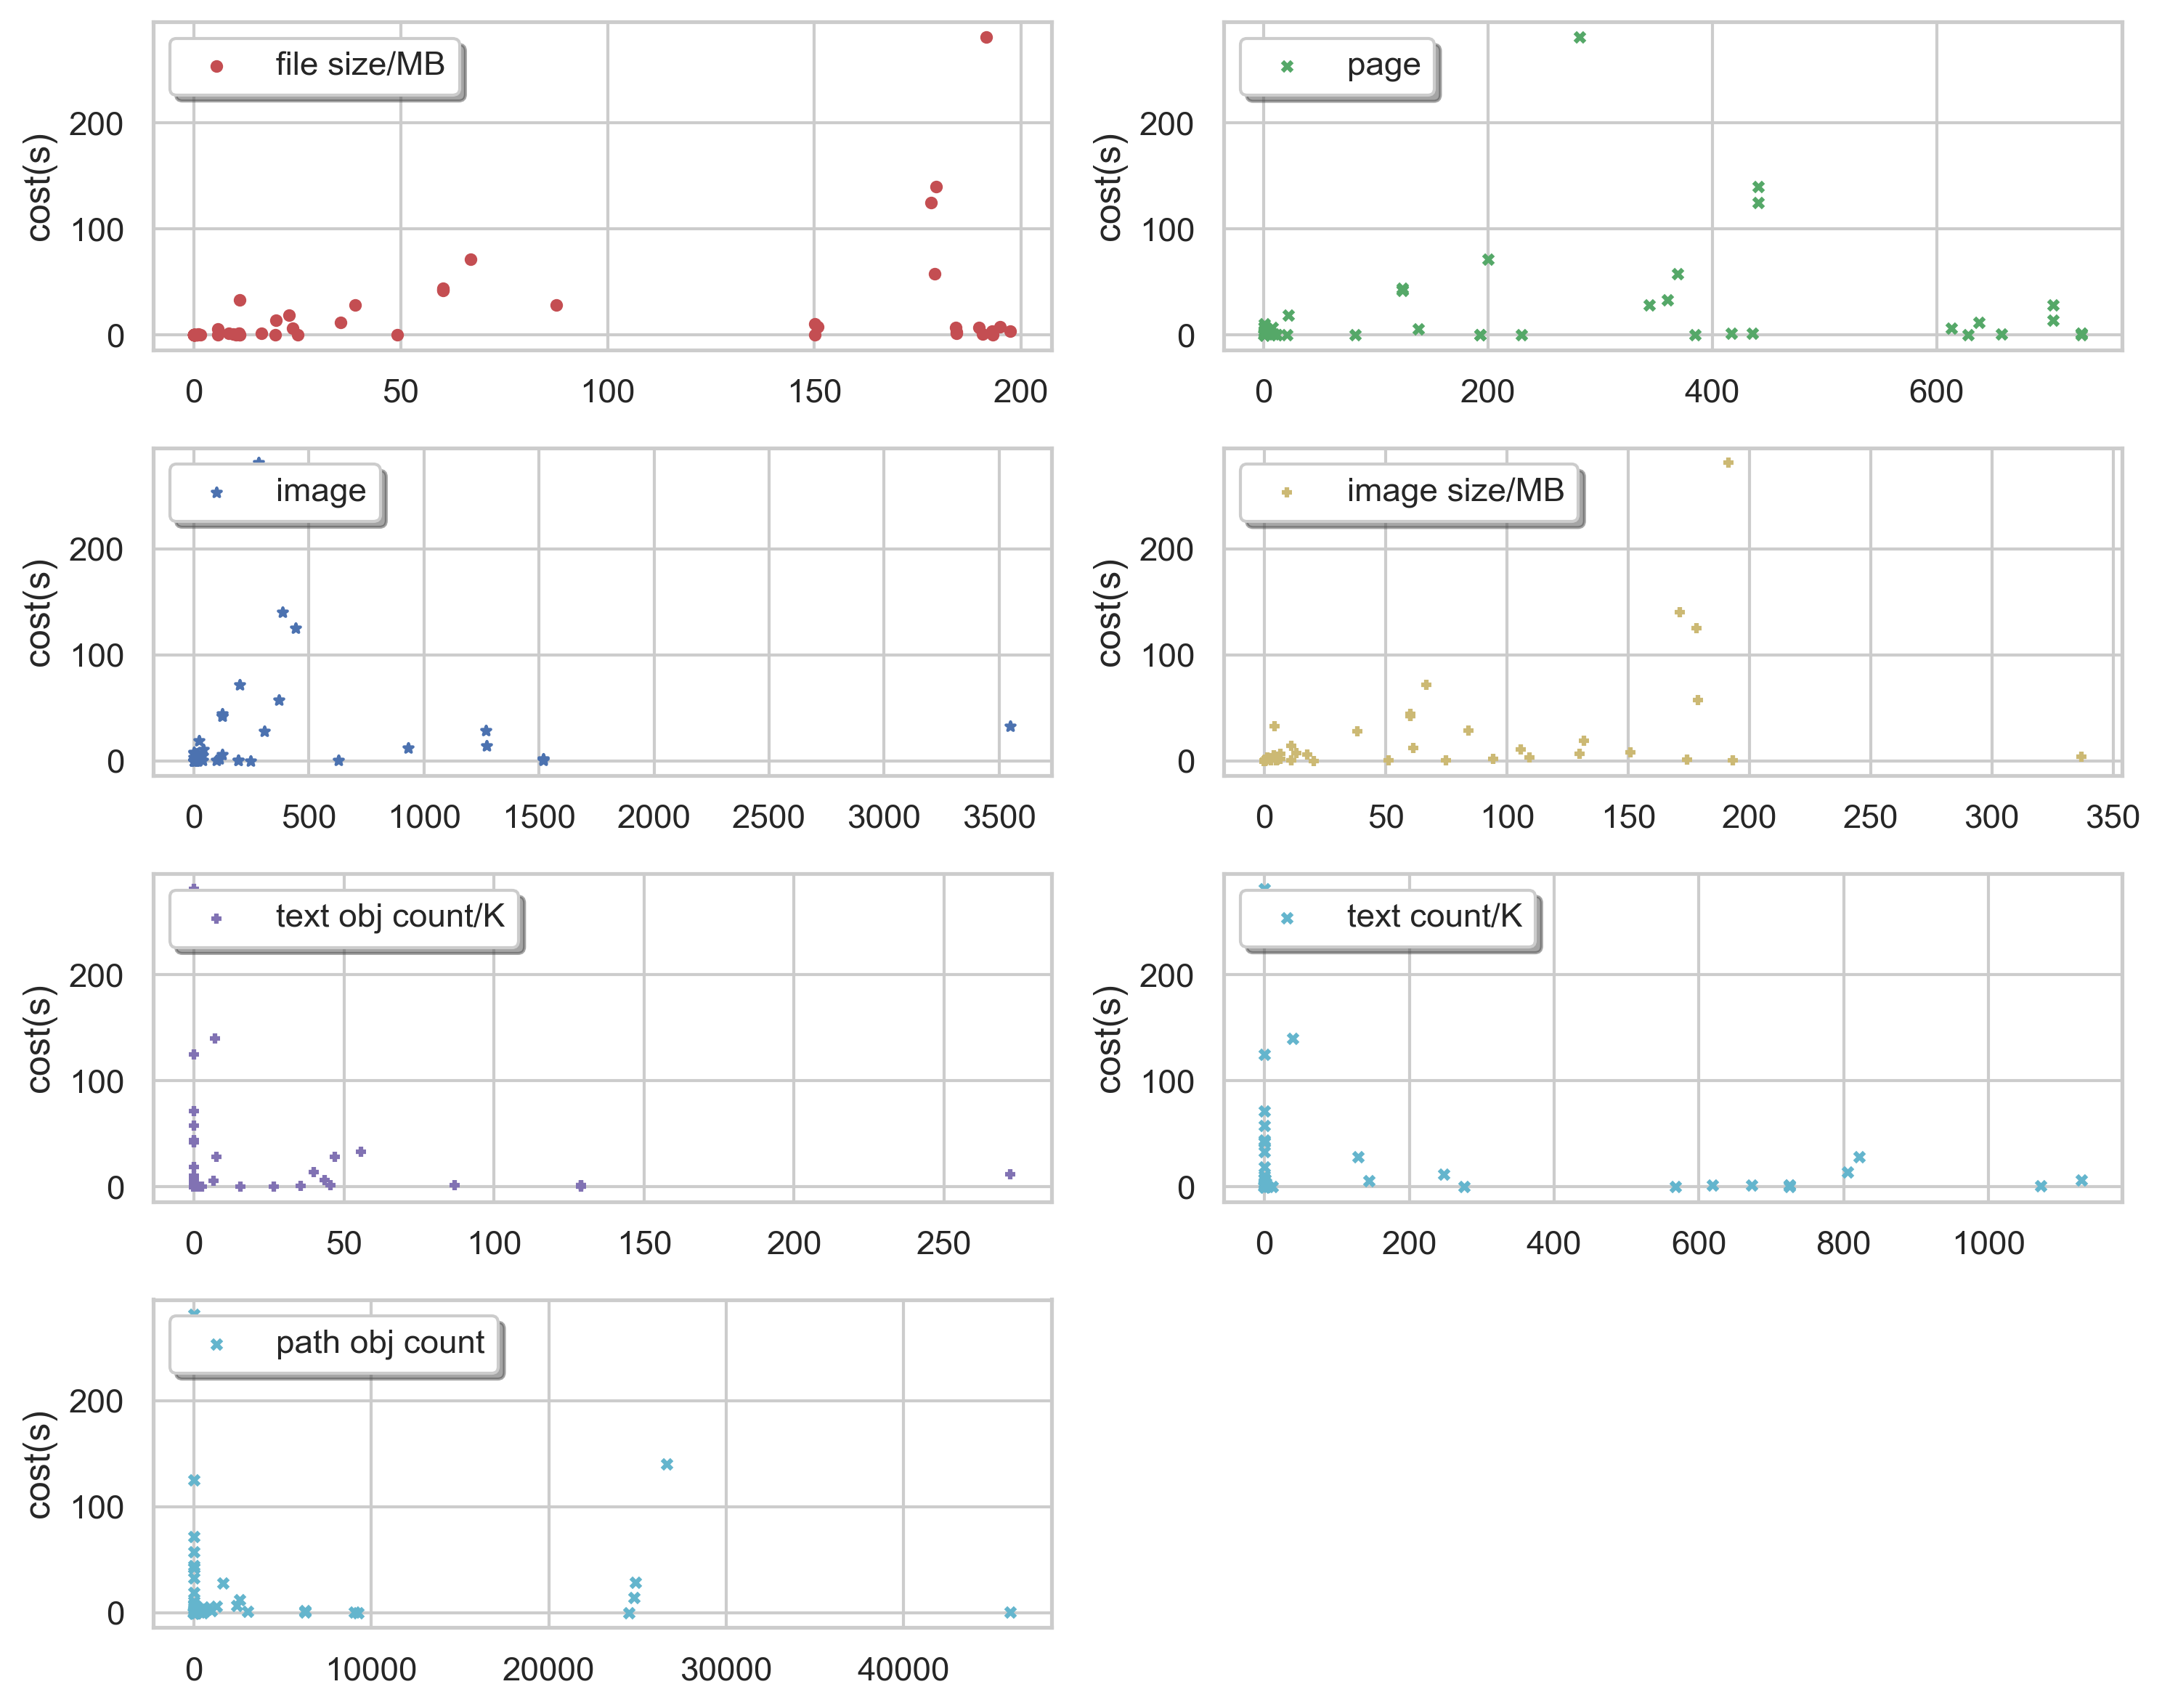

In [46]:
# 不同pdf信息对压缩速度的影响
# 画散点图

import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme(style="")

# 创建子图
fig, axs = plt.subplots(4, 2, figsize=(10, 8), dpi=300)

# 绘制散点图
axs[0, 0].scatter(combined_data['Size_y']/1024/1024,combined_data.Duration/1000, marker='o', color='r', s=10, label='file size/MB')
axs[0, 0].legend(loc='upper left', shadow=True)
axs[0, 0].set(ylabel='cost(s)')

axs[0, 1].scatter(combined_data['PageCount_y'],combined_data.Duration/1000, marker='x', color='g', s=10, label='page')
axs[0, 1].legend(loc='upper left', shadow=True)
axs[0, 1].set(ylabel='cost(s)')

axs[1, 0].scatter(combined_data['ImageObjCount'],combined_data.Duration/1000, marker='*', color='b', s=10, label='image')
axs[1, 0].legend(loc='upper left', shadow=True)
axs[1, 0].set(ylabel='cost(s)')

axs[1, 1].scatter(combined_data['ImageObjSize']/1024/1024,combined_data.Duration/1000, marker='+', color='y', s=10, label='image size/MB')
axs[1, 1].legend(loc='upper left', shadow=True)
axs[1, 1].set(ylabel='cost(s)')

axs[2, 0].scatter(combined_data['TextObjCount']/1000,combined_data.Duration/1000, marker='+', color='m', s=10, label='text obj count/K')
axs[2, 0].legend(loc='upper left', shadow=True)
axs[2, 0].set(ylabel='cost(s)')

axs[2, 1].scatter(combined_data['TextCount']/1000,combined_data.Duration/1000, marker='x', color='c', s=10, label='text count/K')
axs[2, 1].legend(loc='upper left', shadow=True)
axs[2, 1].set(ylabel='cost(s)')

axs[3, 0].scatter(combined_data['PathObjCount'],combined_data.Duration/1000, marker='x', color='c', s=10, label='path obj count')
axs[3, 0].legend(loc='upper left', shadow=True)
axs[3, 0].set(ylabel='cost(s)')

axs[3, 1].remove()

# 调整布局
plt.tight_layout()
plt.show()